In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
df=pd.read_csv(r"E:\dataset\shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
la=LabelEncoder()
df.Gender=la.fit_transform(df.Gender)
df['Item Purchased']=la.fit_transform(df['Item Purchased'])
df.Color=la.fit_transform(df.Color)
df['Frequency of Purchases']=la.fit_transform(df['Frequency of Purchases'])
df['Category']=la.fit_transform(df['Category'])
df.Size=la.fit_transform(df.Size)
df.Season=la.fit_transform(df.Season)
df['Discount Applied']=la.fit_transform(df['Discount Applied'])
df['Promo Code Used']=la.fit_transform(df['Promo Code Used'])
df['Subscription Status']=la.fit_transform(df['Subscription Status'])

In [5]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,Kentucky,0,7,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,3
1,2,19,1,23,1,64,Maine,0,12,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,3
2,3,50,1,11,1,73,Massachusetts,2,12,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,6
3,4,21,1,14,2,90,Rhode Island,1,12,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,6
4,5,45,1,2,1,49,Oregon,1,21,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,0


In [35]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import metrics 
features_columns=['Item Purchased','Subscription Status','Discount Applied','Category','Size']
x=df[features_columns]
y=df.Gender
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3,random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred =clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7598290598290598


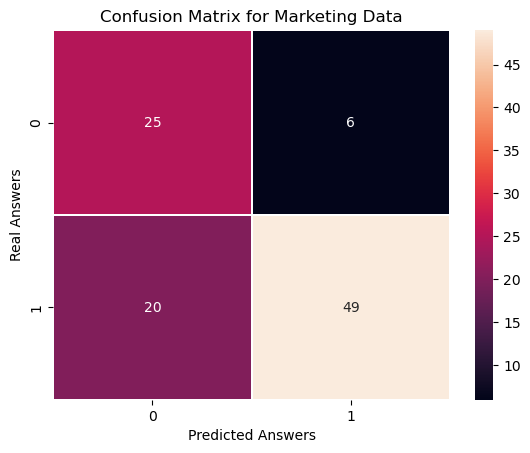

In [39]:
cm = confusion_matrix(y_test[:100], y_pred[:100])
sns.heatmap(cm, annot=True, linewidth=0.1)
plt.xlabel('Predicted Answers')
plt.ylabel('Real Answers')
plt.title('Confusion Matrix for Marketing Data')
plt.show()

In [40]:
correct_answers = cm.diagonal().sum()
total_questions = cm.sum()
accuracy = correct_answers/total_questions * 100
round(accuracy, 3) 

74.0